In [1]:
import pandas as pd
import numpy as np
import itertools
import pmdarima
import warnings
from tqdm import tqdm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
def grid_search_arima(train, p_values, d_values, q_values):
    """Perform a grid search to find the best ARIMA hyperparameters."""
    best_score, best_cfg= float("inf"), None
    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            model= ARIMA(train, order=(p, d, q)).fit()
            predictions= model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
            error= mean_squared_error(test, predictions)
            if error<best_score:
                best_score, best_cfg= error, (p, d, q)
        except:
            continue
    return best_cfg

In [4]:
df= pd.read_csv("updated_air_quality_dataset.csv")

df['Date']= pd.to_datetime(df['Date'] + ' ' + df['Hour'].astype(str) + ':00:00')
df.set_index('Date', inplace=True)

counties= ["Cook", "Los Angeles", "New York"]
target_vars= ["PM2.5", "PM10", "NO2"]

p_values= range(0, 3)
d_values= range(0, 3)
q_values= range(0, 3)

----------------------------------------------------------------------------------------------------
Training ARIMA for Chicago

PM2.5-2020
Best ARIMA hyperparameters: (1, 2, 1)
Test RMSE: 4.715


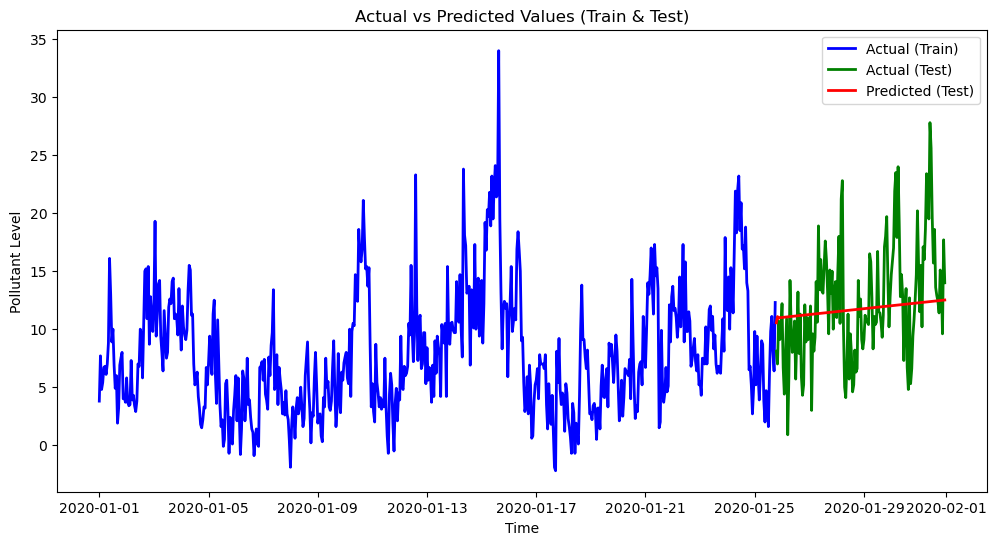


PM10-2020
Best ARIMA hyperparameters: (1, 2, 2)
Test RMSE: 9.714


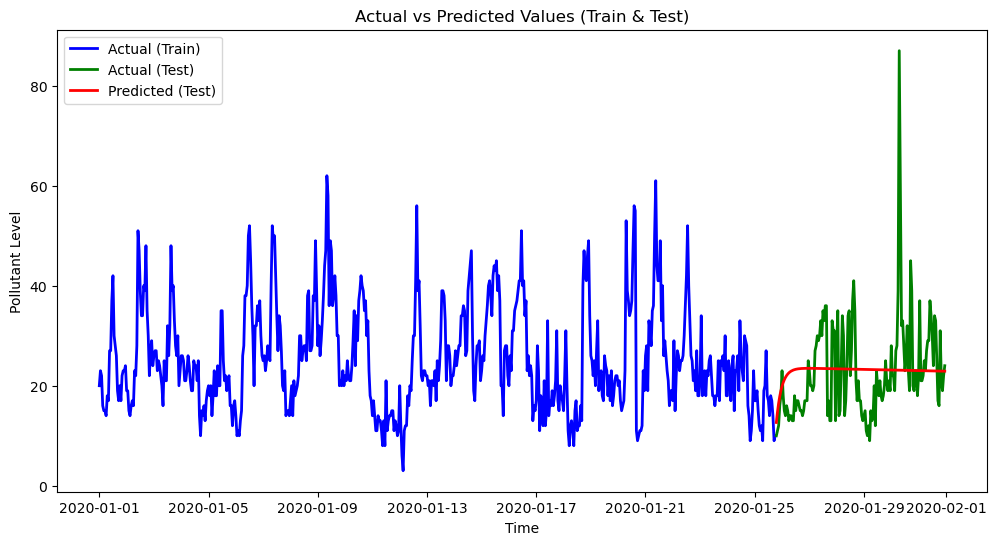


NO2-2020
Best ARIMA hyperparameters: (1, 1, 2)
Test RMSE: 7.969


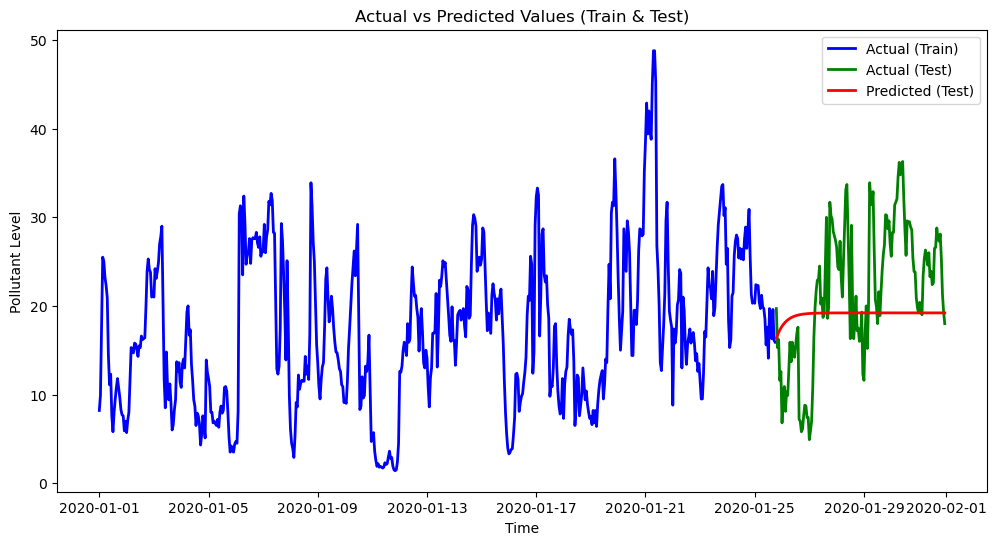


PM2.5-2021
Best ARIMA hyperparameters: (0, 0, 0)
Test RMSE: 3.785


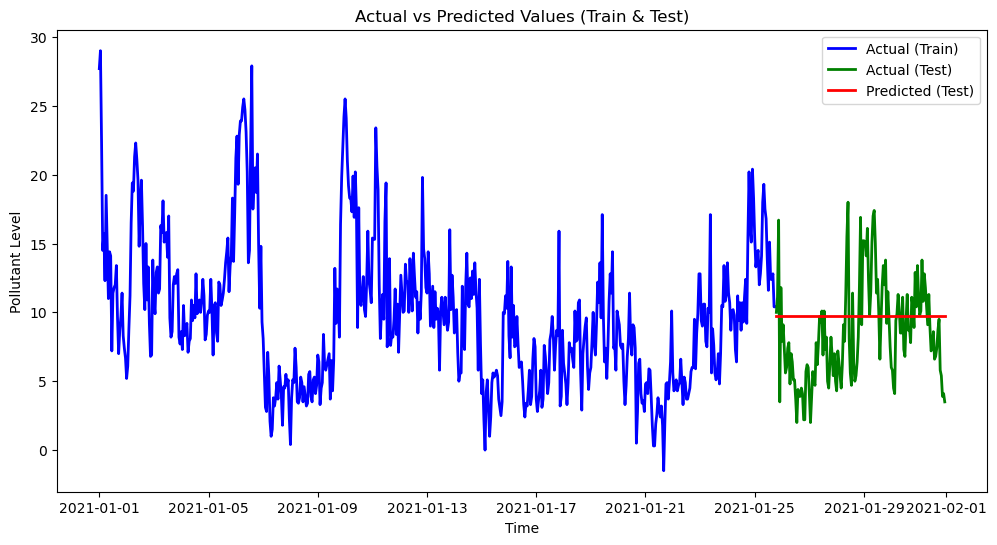


PM10-2021
Best ARIMA hyperparameters: (2, 0, 1)
Test RMSE: 13.976


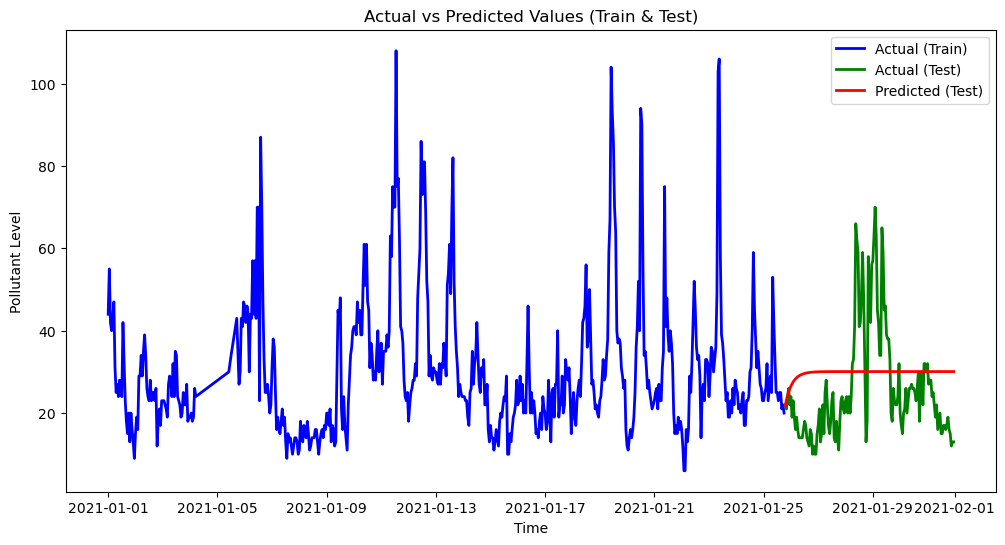


NO2-2021
Best ARIMA hyperparameters: (1, 0, 0)
Test RMSE: 9.929


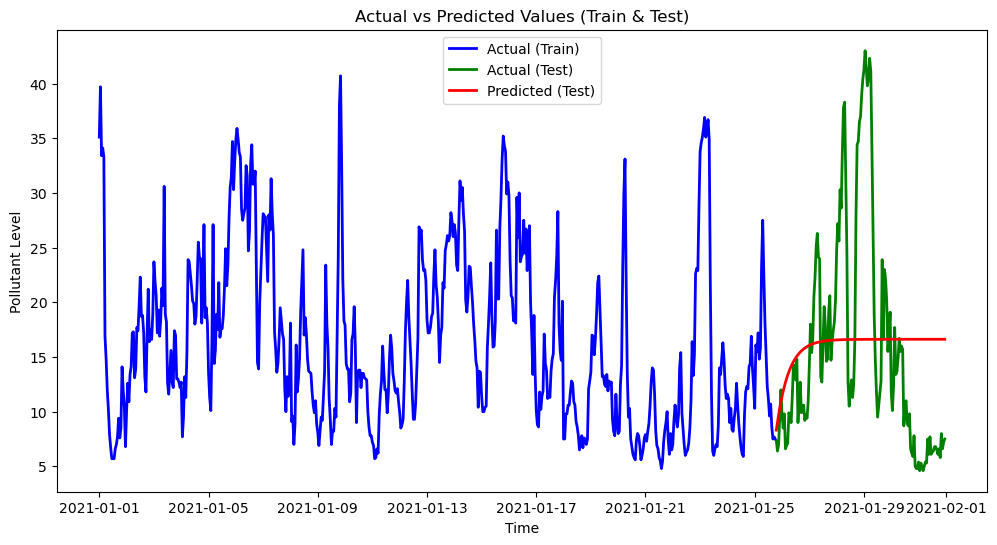


PM2.5-2022
Best ARIMA hyperparameters: (1, 2, 2)
Test RMSE: 8.001


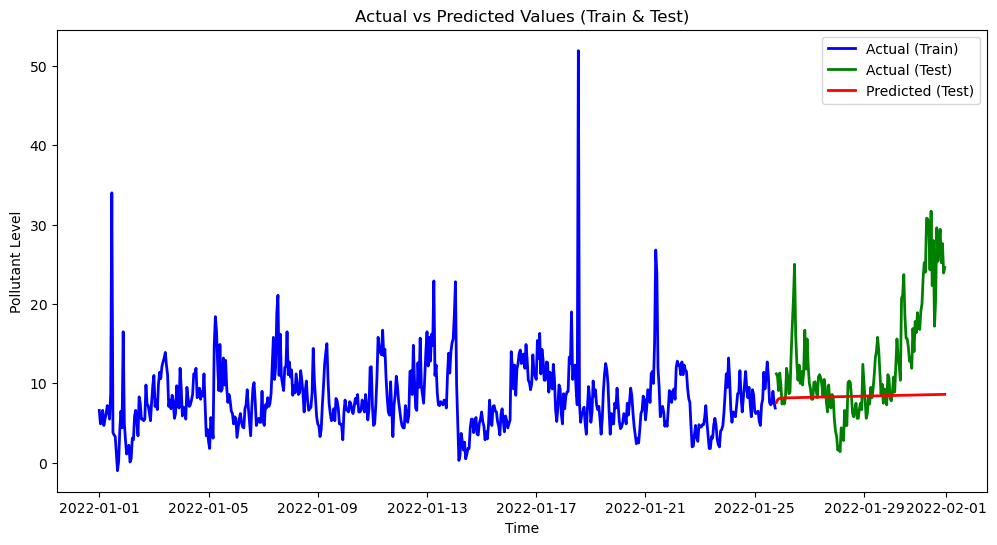


PM10-2022
Best ARIMA hyperparameters: (0, 2, 2)
Test RMSE: 19.648


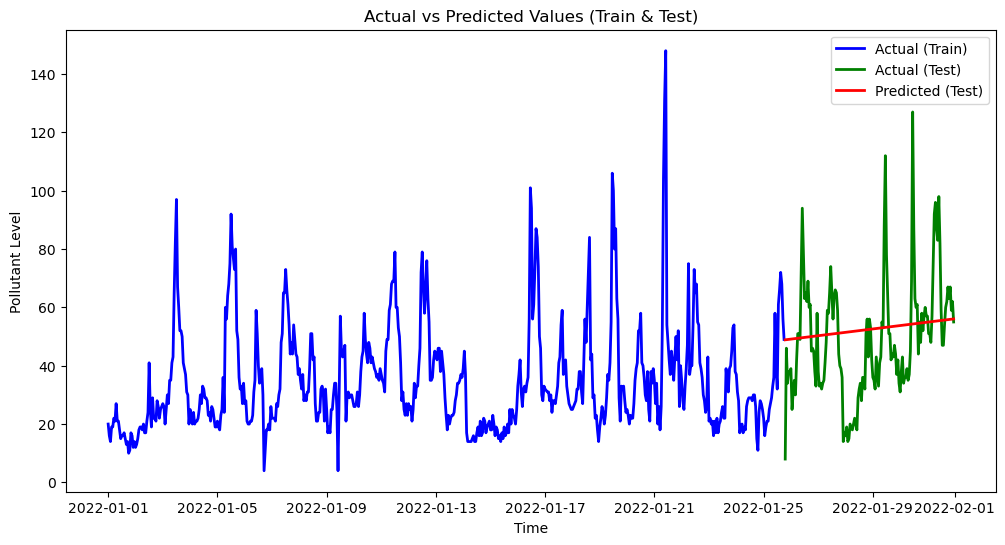


NO2-2022
Best ARIMA hyperparameters: (0, 2, 2)
Test RMSE: 9.581


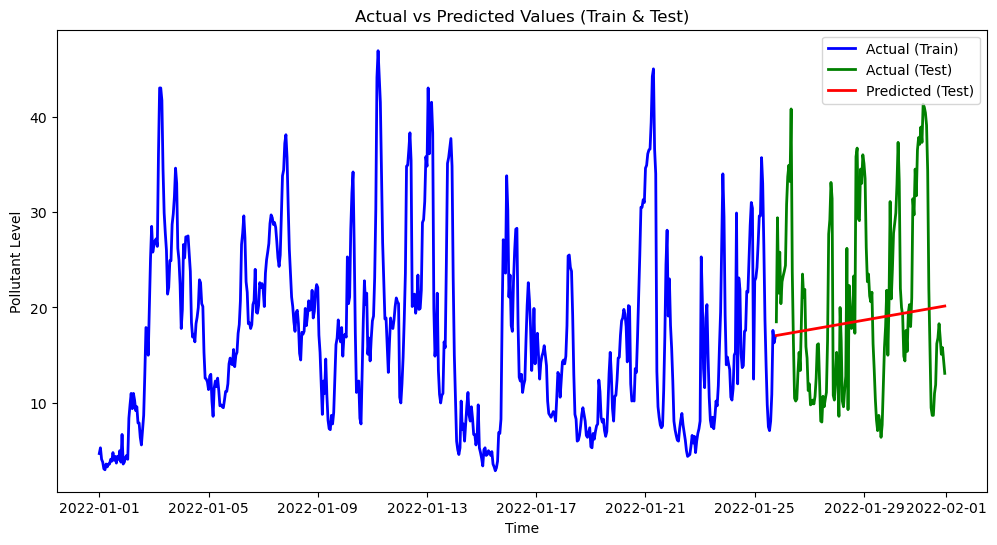


PM2.5-2023
Best ARIMA hyperparameters: (2, 1, 1)
Test RMSE: 3.436


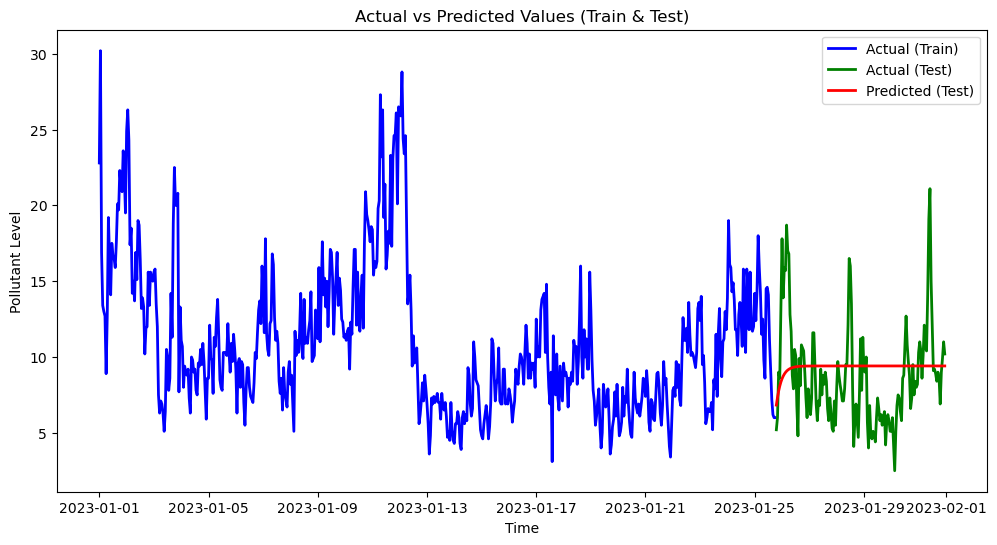


PM10-2023
Best ARIMA hyperparameters: (2, 2, 2)
Test RMSE: 18.559


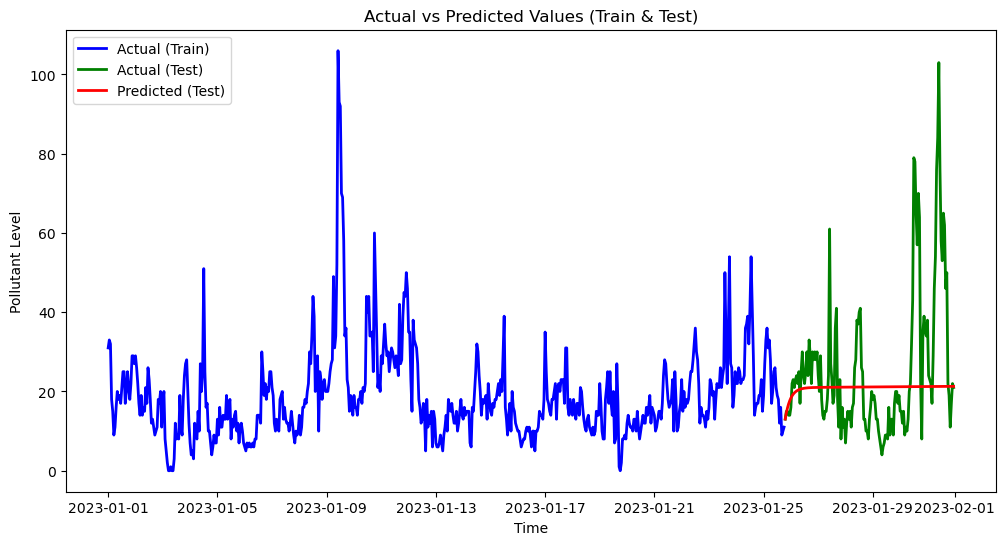


NO2-2023
Best ARIMA hyperparameters: (2, 1, 2)
Test RMSE: 4.722


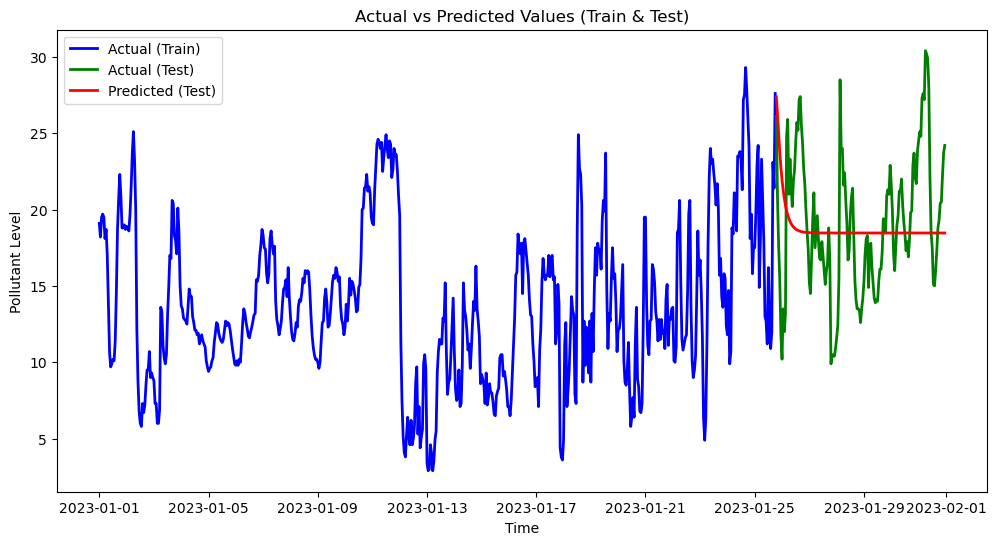


PM2.5-2024
Best ARIMA hyperparameters: (1, 2, 2)
Test RMSE: 3.464


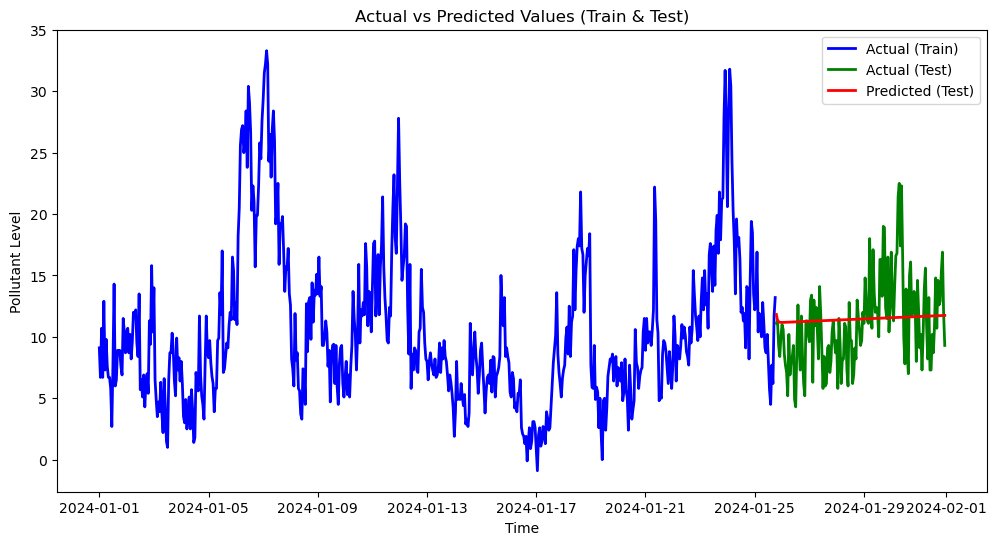


PM10-2024
Best ARIMA hyperparameters: (0, 2, 1)
Test RMSE: 10.210


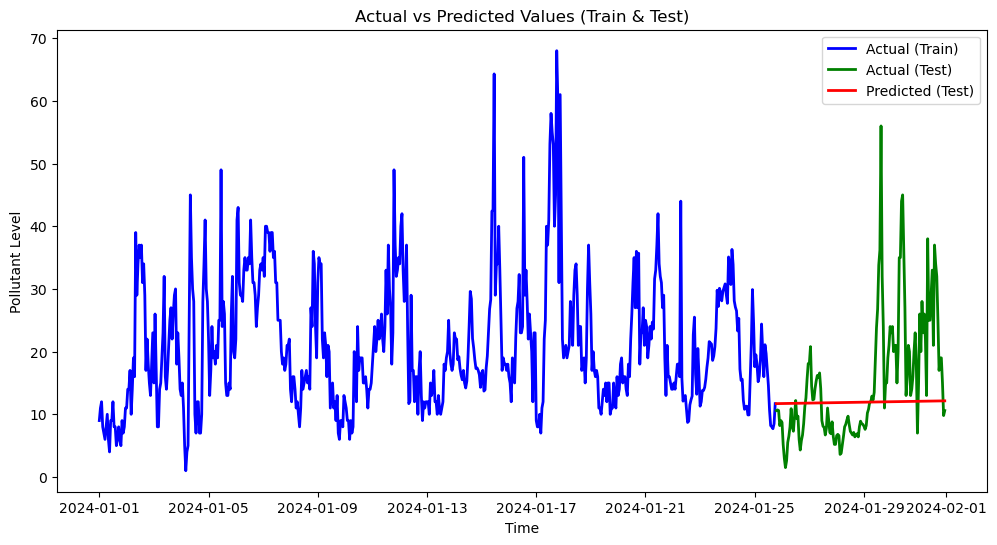


NO2-2024
Best ARIMA hyperparameters: (1, 2, 1)
Test RMSE: 6.476


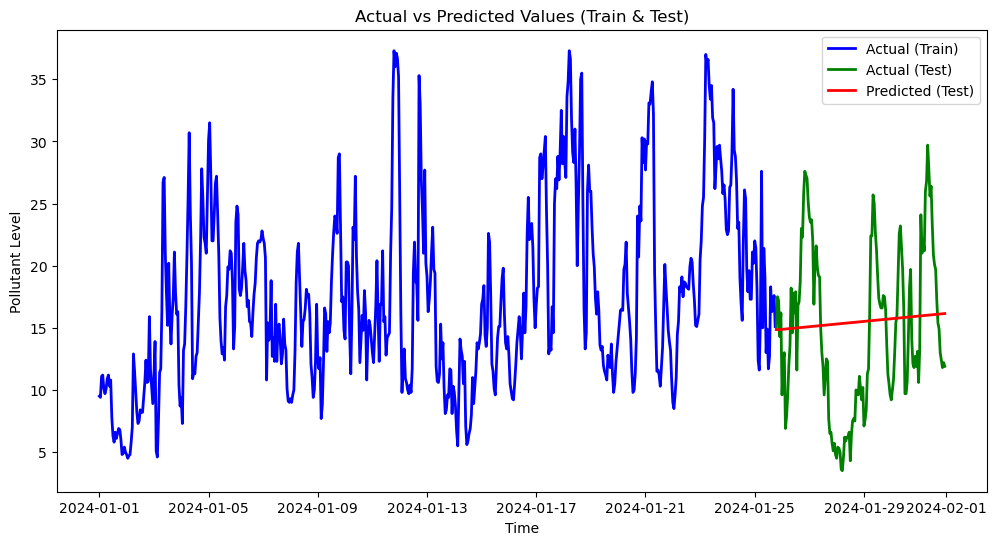

----------------------------------------------------------------------------------------------------
Training ARIMA for Los Angeles

PM2.5-2020
Best ARIMA hyperparameters: (2, 1, 1)
Test RMSE: 10.317


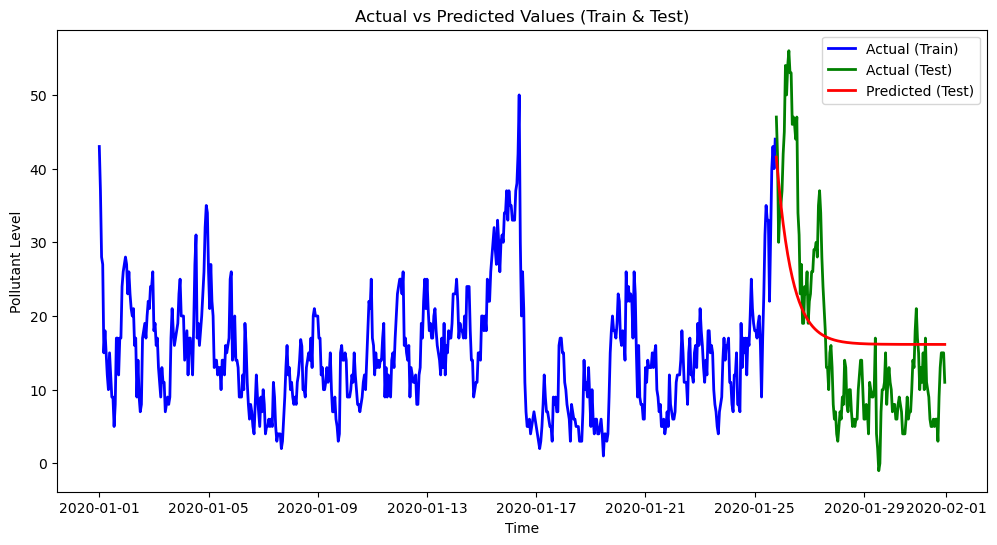


PM10-2020
Best ARIMA hyperparameters: (1, 1, 2)
Test RMSE: 15.654


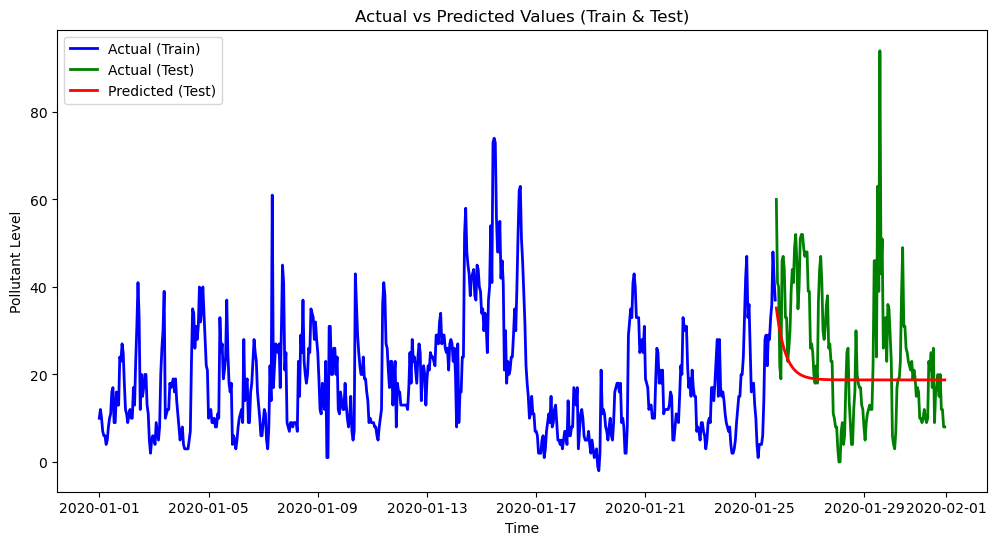


NO2-2020
Best ARIMA hyperparameters: (0, 0, 2)
Test RMSE: 15.012


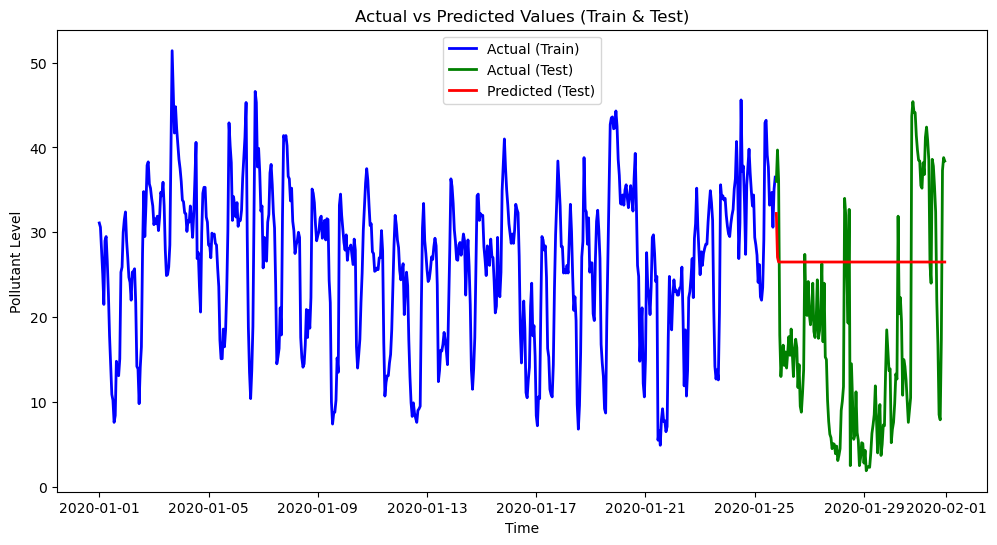


PM2.5-2021
Best ARIMA hyperparameters: (1, 0, 1)
Test RMSE: 6.902


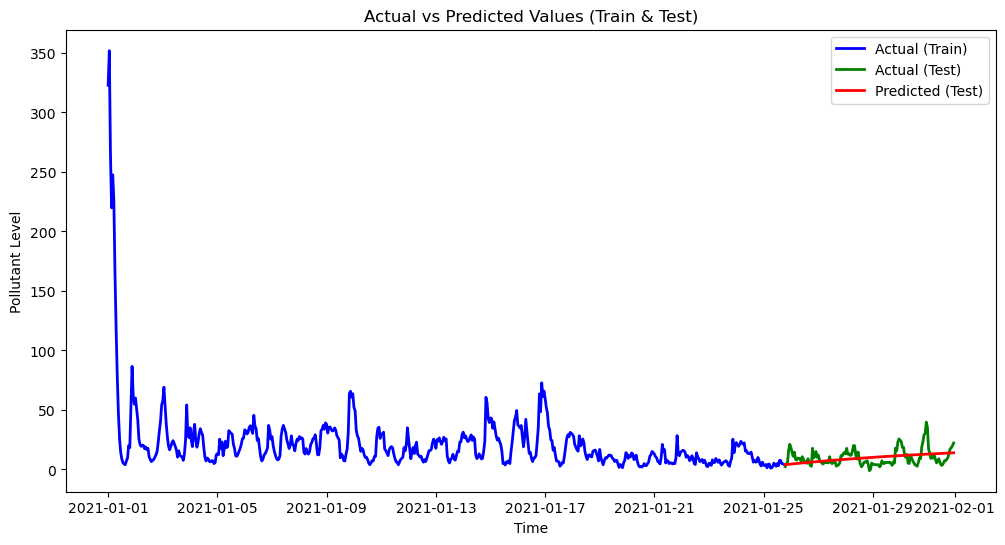


PM10-2021
Best ARIMA hyperparameters: (1, 2, 2)
Test RMSE: 6.176


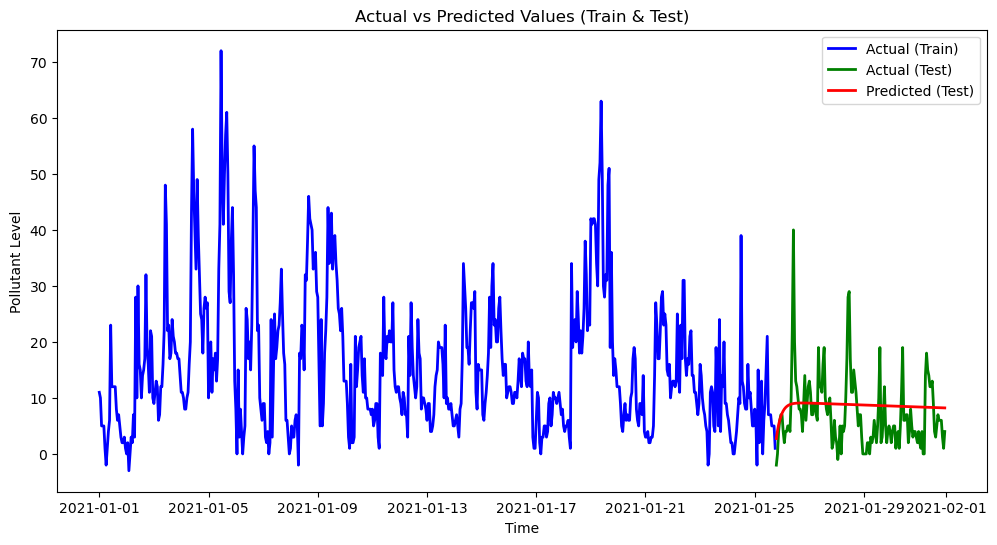


NO2-2021
Best ARIMA hyperparameters: (1, 0, 0)
Test RMSE: 8.323


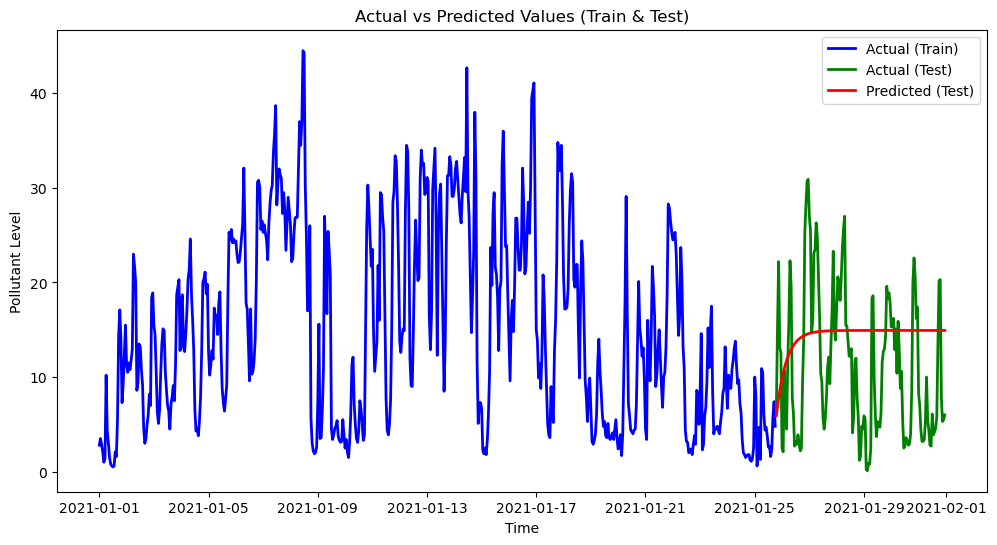


PM2.5-2022
Best ARIMA hyperparameters: (2, 0, 2)
Test RMSE: 10.520


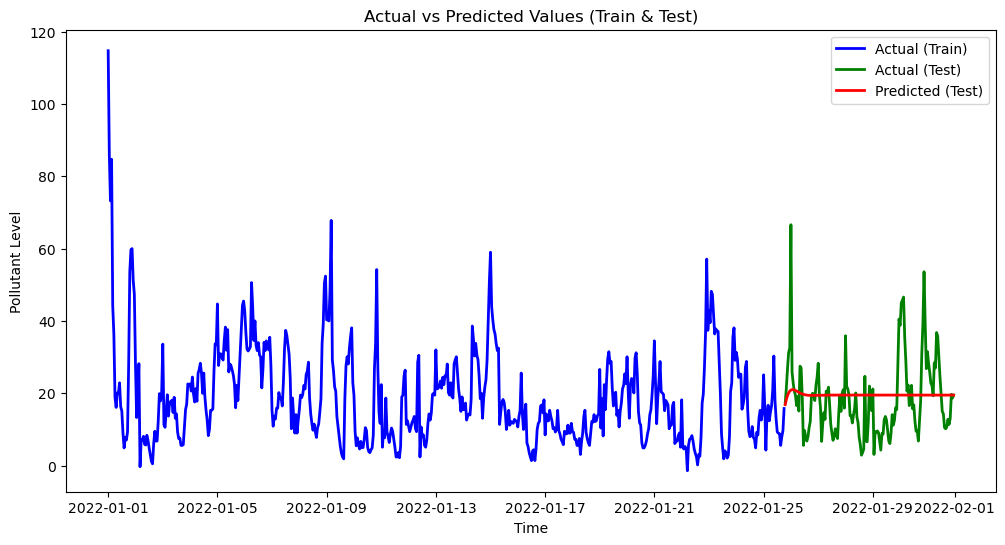


PM10-2022
Best ARIMA hyperparameters: (0, 1, 1)
Test RMSE: 39.161


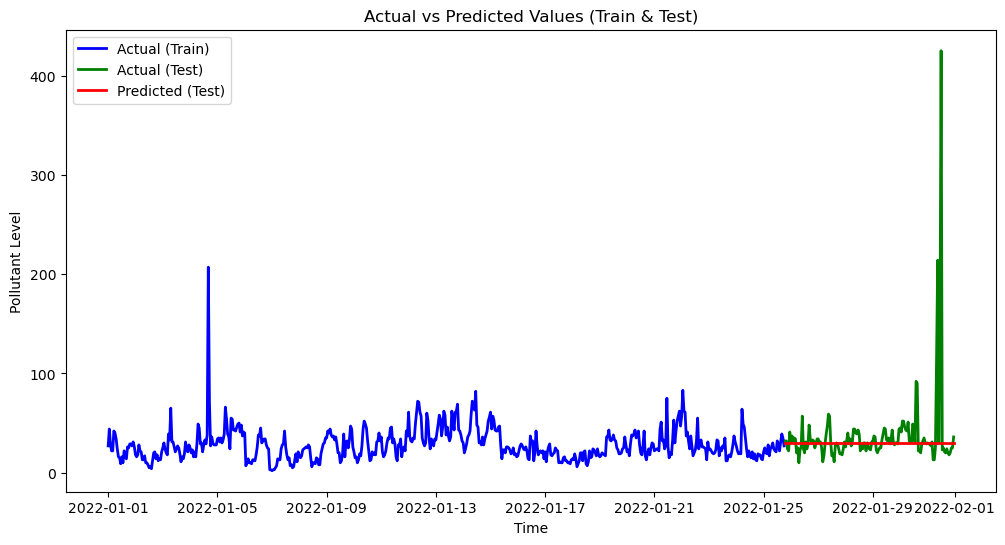


NO2-2022
Best ARIMA hyperparameters: (0, 2, 1)
Test RMSE: 9.184


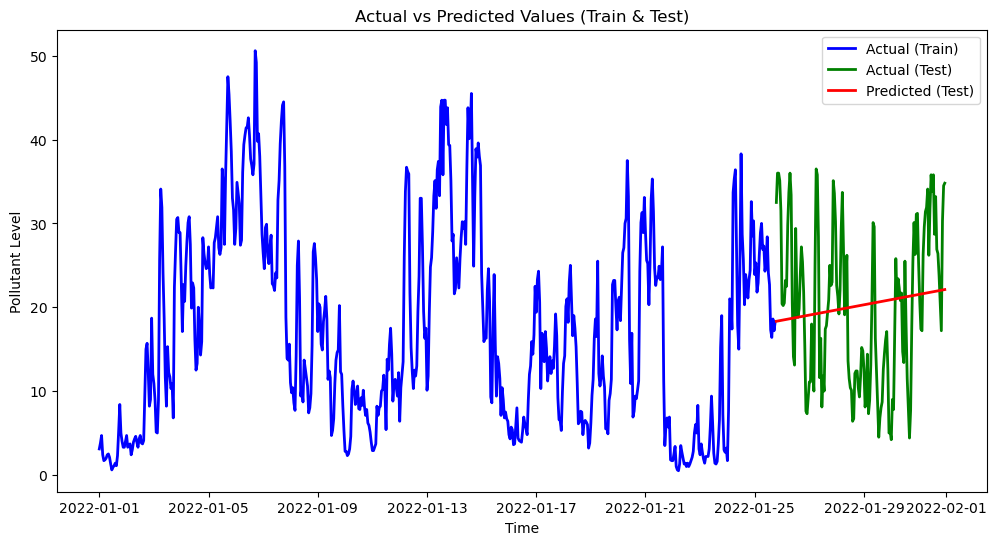


PM2.5-2023
Best ARIMA hyperparameters: (2, 2, 2)
Test RMSE: 4.375


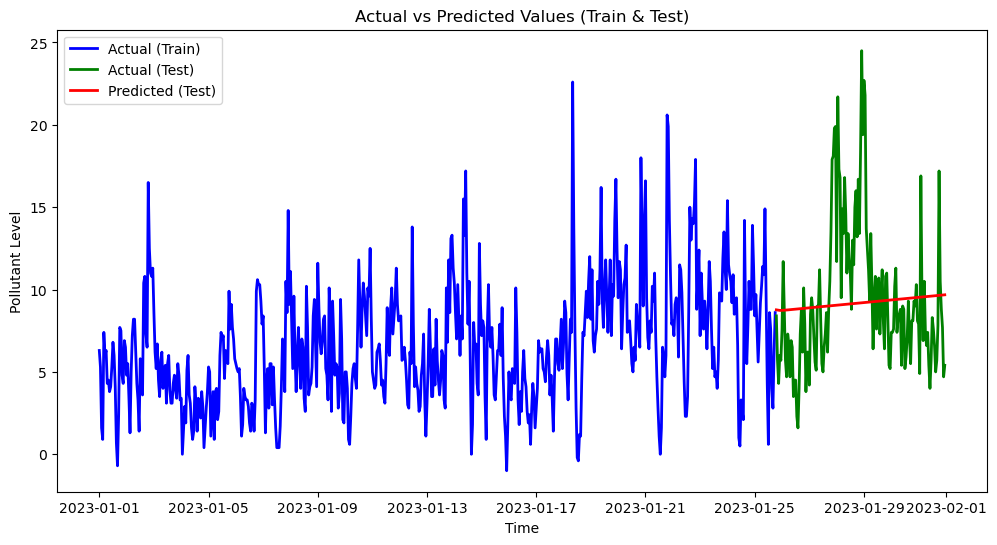


PM10-2023
Best ARIMA hyperparameters: (0, 1, 0)
Test RMSE: 9.942


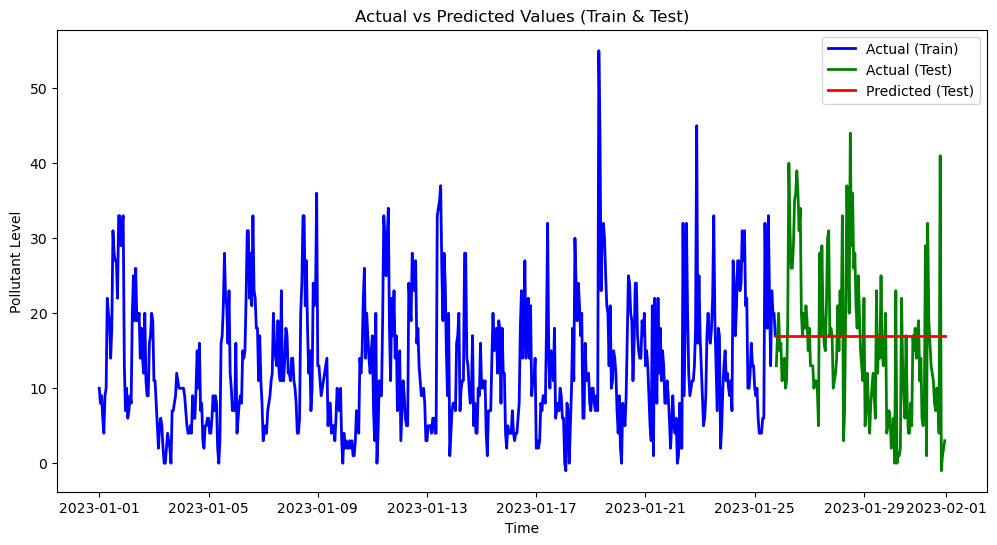


NO2-2023
Best ARIMA hyperparameters: (2, 0, 2)
Test RMSE: 10.839


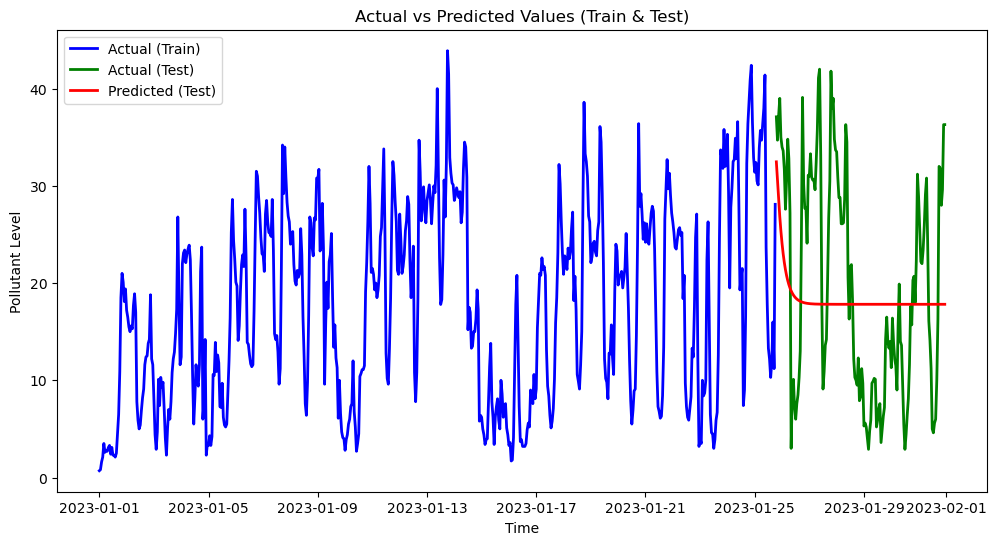


PM2.5-2024
Best ARIMA hyperparameters: (0, 1, 0)
Test RMSE: 4.511


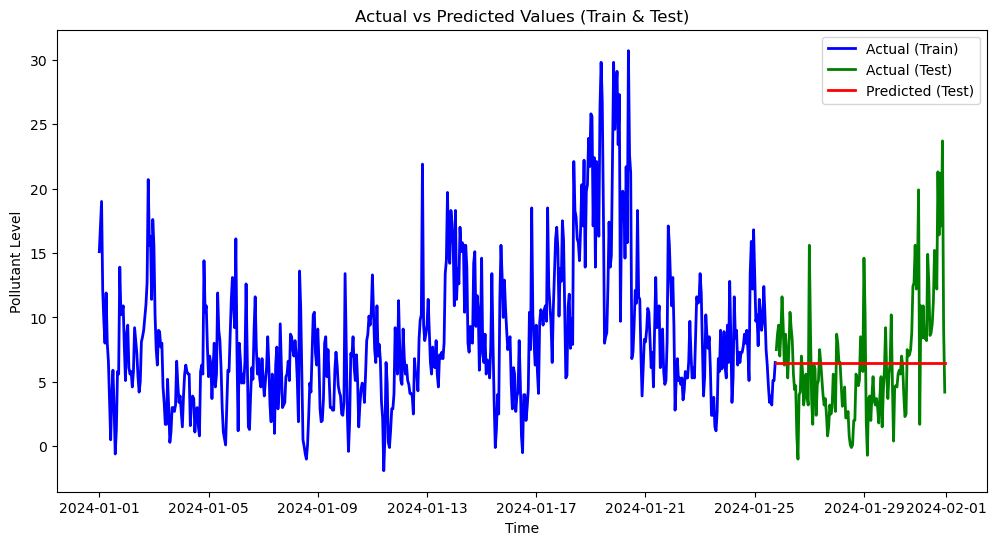


PM10-2024
Best ARIMA hyperparameters: (0, 2, 2)
Test RMSE: 5.342


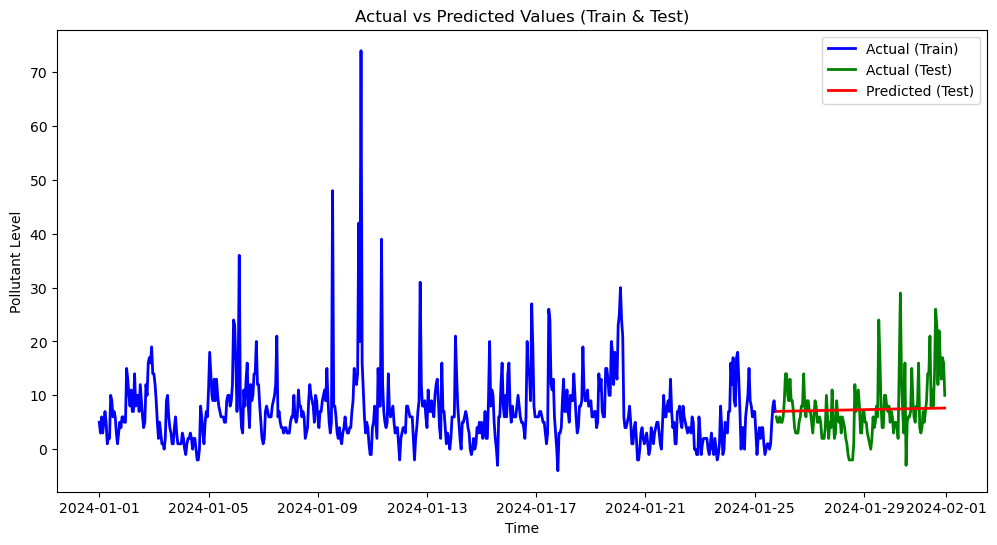


NO2-2024
Best ARIMA hyperparameters: (2, 2, 2)
Test RMSE: 4.093


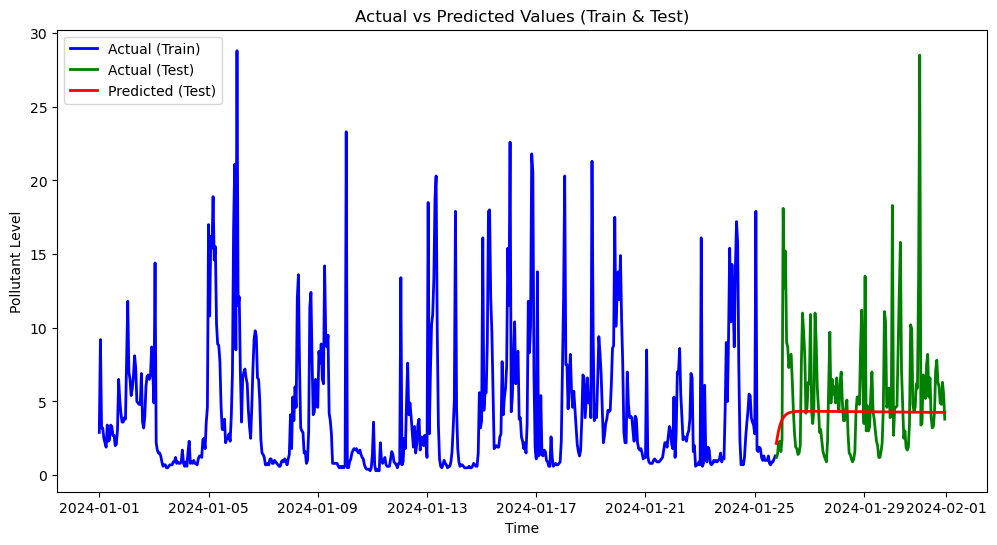

----------------------------------------------------------------------------------------------------
Training ARIMA for New York

PM2.5-2020
Best ARIMA hyperparameters: (2, 2, 1)
Test RMSE: 4.620


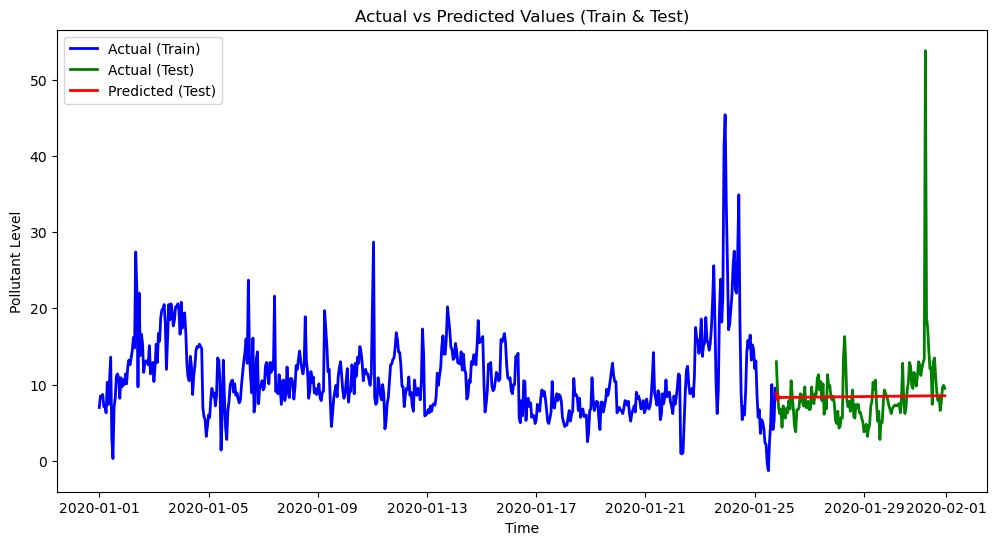


PM2.5-2021
Best ARIMA hyperparameters: (2, 1, 1)
Test RMSE: 2.203


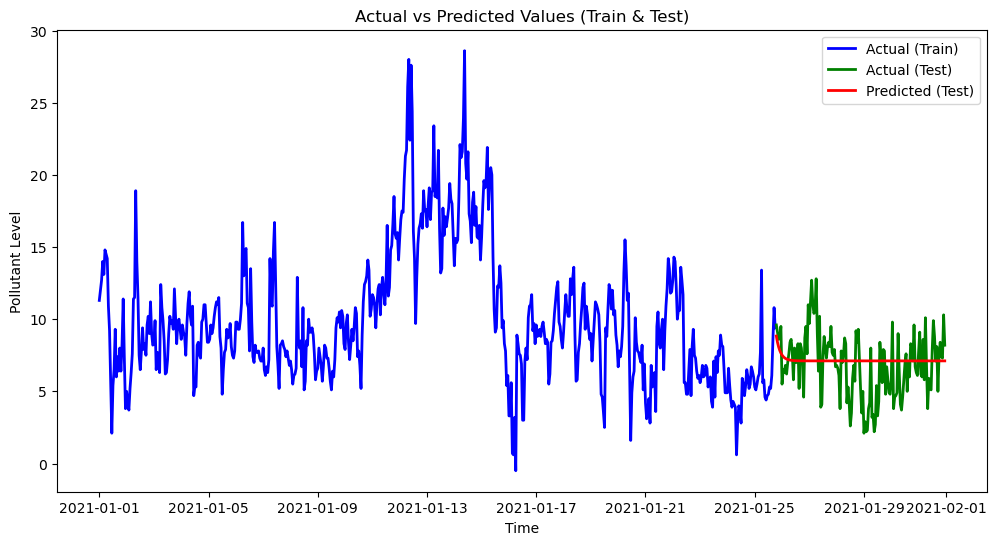


PM2.5-2022
Best ARIMA hyperparameters: (0, 0, 1)
Test RMSE: 4.563


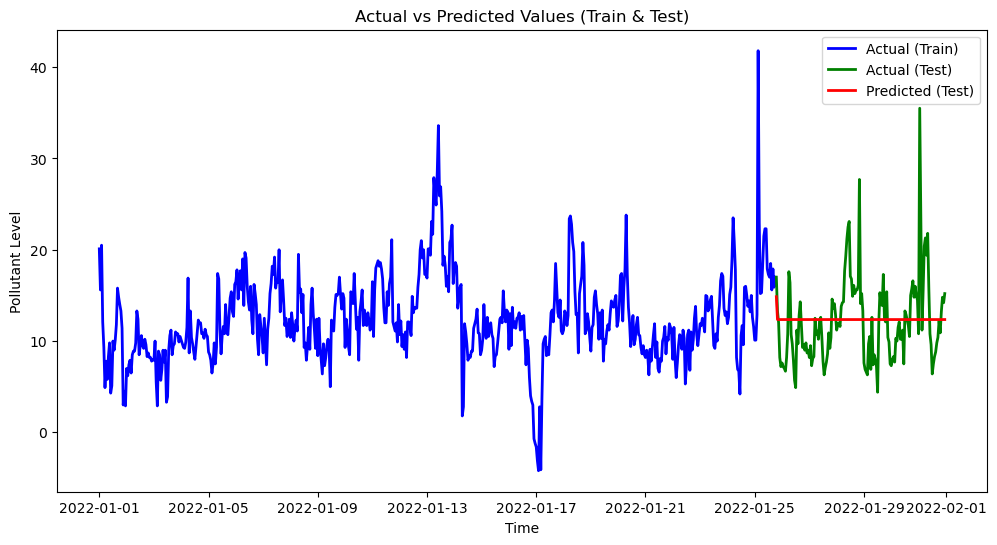


PM2.5-2023
Best ARIMA hyperparameters: (1, 1, 2)
Test RMSE: 3.552


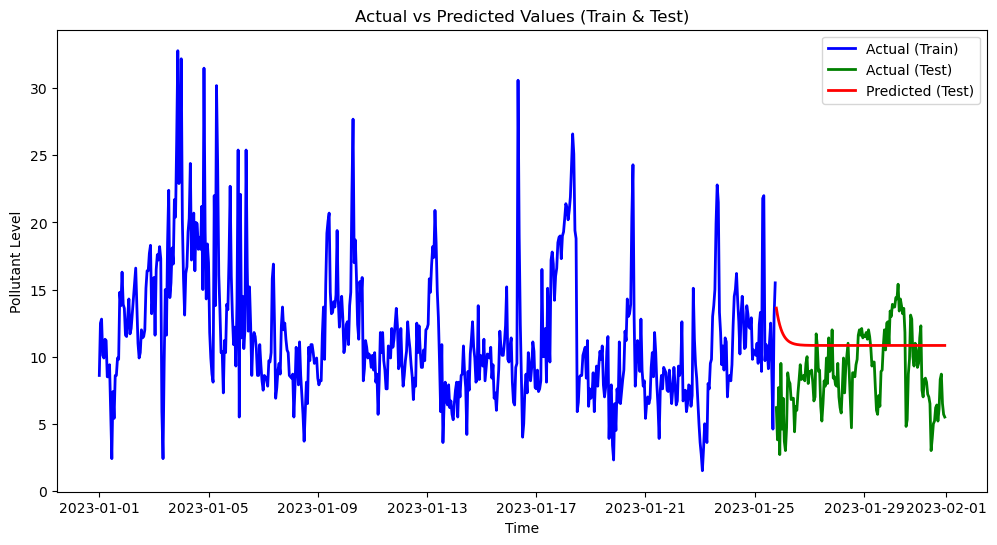


PM2.5-2024
Best ARIMA hyperparameters: (1, 0, 2)
Test RMSE: 8.683


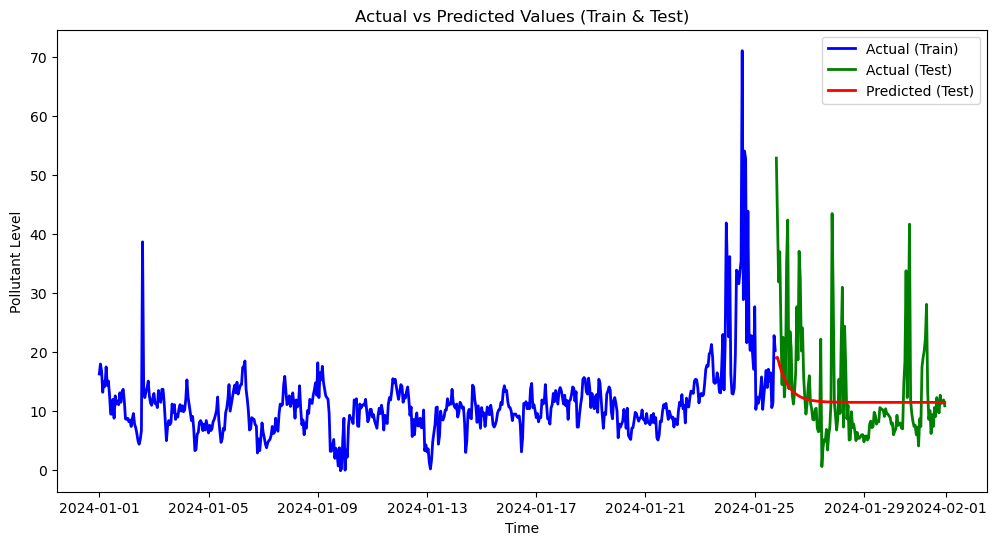

In [9]:
results= {}

for county in counties:
    county_df= df[df["County Name"] == county]
    years= county_df["Year"].unique()
    print("-"*100)
    print(f"Training ARIMA for {county if county!="Cook" else "Chicago"}")
    
    for year in years:
        yearly_df= county_df[county_df["Year"] == year]
        yearly_df= yearly_df.sort_values(["Month", "Day", "Hour"])  # Ensuring time order
        
        for var in target_vars:
            if yearly_df[var].isna().sum() > 0.2 * len(yearly_df): #Ensuring there is enough data
                continue

            data = yearly_df[var]
            train_size= int(len(data) * 0.8)
            train, test= data[:train_size], data[train_size:]
            
            best_params= grid_search_arima(train, p_values, d_values, q_values) #Applying Grid Search
            print(f"\n{var}-{year}")
            if best_params:
                print(f"Best ARIMA hyperparameters: {best_params}")
                model= ARIMA(train, order=best_params).fit()
                predictions= model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
                
                rmse= np.sqrt(mean_squared_error(test, predictions))
                print(f"Test RMSE: {rmse:.3f}")
                results[(county if county!="Cook" else "Chicago", year, var)]= (best_params, rmse)

                #Generating the graph to visualize the results
                plt.figure(figsize=(12,6))
                plt.plot(train.index, train, label="Actual (Train)", color="blue", linewidth=2)
                plt.plot(test.index, test, label="Actual (Test)", color="green", linewidth=2)
                plt.plot(test.index, predictions, label="Predicted (Test)", color="red", linewidth=2)
                plt.xlabel("Time")
                plt.ylabel("Pollutant Level")
                plt.title("Actual vs Predicted Values (Train & Test)")
                plt.legend()
                plt.show()
            else:
                print(f"No suitable ARIMA model found")


In [11]:
results_df= pd.DataFrame(results).T
results_df.columns= ["Best ARIMA Order", "Test RMSE"]
results_df

Best ARIMA Order  Test RMSE
Chicago     2020 PM2.5        (1, 2, 1)   4.714933
                 PM10         (1, 2, 2)    9.71382
                 NO2          (1, 1, 2)   7.968849
            2021 PM2.5        (0, 0, 0)   3.785337
                 PM10         (2, 0, 1)  13.976038
                 NO2          (1, 0, 0)   9.928531
            2022 PM2.5        (1, 2, 2)   8.001072
                 PM10         (0, 2, 2)   19.64774
                 NO2          (0, 2, 2)   9.581234
            2023 PM2.5        (2, 1, 1)   3.436328
                 PM10         (2, 2, 2)  18.559136
                 NO2          (2, 1, 2)   4.722461
            2024 PM2.5        (1, 2, 2)   3.464474
                 PM10         (0, 2, 1)  10.209528
                 NO2          (1, 2, 1)   6.476069
Los Angeles 2020 PM2.5        (2, 1, 1)  10.316622
                 PM10         (1, 1, 2)  15.653631
                 NO2          (0, 0, 2)  15.011831
            2021 PM2.5        (1, 0, 1)   6.901602
                 PM10         (1, 2, 2)   6.176459
                 NO2          (1, 0, 0)   8.323339
            2022 PM2.5        (2, 0, 2)  10.519536
                 PM10         (0, 1, 1)  39.161457
                 NO2          (0, 2, 1)   9.184452
            2023 PM2.5        (2, 2, 2)   4.374762
                 PM10         (0, 1, 0)   9.942452
                 NO2          (2, 0, 2)  10.839204
            2024 PM2.5        (0, 1, 0)   4.510733
                 PM10         (0, 2, 2)   5.341631
                 NO2          (2, 2, 2)   4.092617
New York    2020 PM2.5        (2, 2, 1)   4.620246
            2021 PM2.5        (2, 1, 1)   2.202932
            2022 PM2.5        (0, 0, 1)   4.562514
            2023 PM2.5        (1, 1, 2)   3.552367
            2024 PM2.5        (1, 0, 2)   8.683338